In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import sim.automata as atm
import analysis.analysis as ans
import analysis.stats as stats
from sim.rules import Rules

from machine_learning.q_learning_agents import QLearningAgent
from machine_learning.state import State

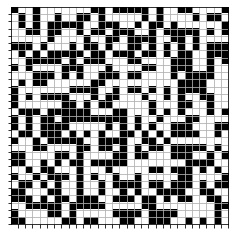

In [7]:
np.random.seed(0)
init_state = State(atm.get_random_state((30, 30)), Rules.CONWAY)
#print(init_state)
ans.plot_state(init_state.values)

In [8]:
# we need to define an action function to obtain the legal actions, which would involve placing
# anywhere that is not alive on the board.

# then, how to evaluate said action

action_func = lambda state: np.arange(state.shape[0]*state.shape[1])[state.flat == 0]
reward_func = lambda state: (state.values == 1).sum()

In [ ]:
from tqdm import tqdm

In [9]:
def run(init_state, action_func, reward_func, episode_length = 10):
    agent = QLearningAgent(action_func = action_func, reward_func = reward_func)
    
    state = init_state.copy()
    while agent.episodes_so_far < agent.num_training + 50:
        
        agent.start_episode()
        for i in range(episode_length):
            _ = agent.observe_function(state)
            
            action = agent.get_action(state)
            agent.do_action(state, action)
            
            state = state.get_successor(action)
        
        agent.stop_episode()
        print(f"Train Rewards: {agent.accum_train_rewards}")
        print(f"Test Rewards: {agent.accum_test_rewards}\n")
        

In [10]:
run(init_state, action_func, reward_func)

Train Rewards: 0.0
Test Rewards: 0.0

Train Rewards: -284.0
Test Rewards: 0.0

Train Rewards: -328.0
Test Rewards: 0.0

Train Rewards: -328.0
Test Rewards: 0.0

Train Rewards: -308.0
Test Rewards: 0.0

Train Rewards: -315.0
Test Rewards: 0.0

Train Rewards: -330.0
Test Rewards: 0.0

Train Rewards: -328.0
Test Rewards: 0.0

Train Rewards: -298.0
Test Rewards: 0.0

Train Rewards: -296.0
Test Rewards: 0.0

Train Rewards: -322.0
Test Rewards: 0.0

Train Rewards: -338.0
Test Rewards: 0.0

Train Rewards: -324.0
Test Rewards: 0.0

Train Rewards: -366.0
Test Rewards: 0.0

Train Rewards: -355.0
Test Rewards: 0.0

Train Rewards: -328.0
Test Rewards: 0.0

Train Rewards: -323.0
Test Rewards: 0.0

Train Rewards: -300.0
Test Rewards: 0.0

Train Rewards: -326.0
Test Rewards: 0.0

Train Rewards: -302.0
Test Rewards: 0.0

Train Rewards: -290.0
Test Rewards: 0.0

Train Rewards: -277.0
Test Rewards: 0.0

Train Rewards: -253.0
Test Rewards: 0.0

Train Rewards: -242.0
Test Rewards: 0.0

Train Rewards: -236

In [25]:
agent.observe_function(state)

array([[1, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0]])

In [18]:
action = agent.get_action(state)
action

0

In [19]:
agent.last_state

In [20]:
agent.do_action(state, action)

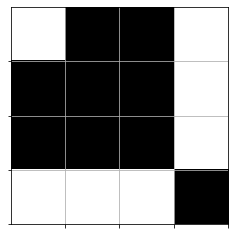

In [21]:
state = state.get_successor(action)
ans.plot_state(state.values)